## Observations and Insights 

# Three observations or inferences that can be made from the data. 

1. The linear regression model run for Capomulin suggests a **positive correlation** between mouse weight and average tumor size. (The r-value = 0.84 and the r-squared = 0.71)

2. Ramicane had summary statistics and timepoint data similar to Capomulin, which may warrant further investigation of **Ramicane's efficacy**.  

3. Mouse distribution by sex is 49% female and 51% male, which is **close to the theoretical 50/50 distribution** we would expect by nature. Hence our sample does not seem to be skewed by mouse sex.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview

df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Rename columns to easier names

df = df.rename(columns={"Mouse ID":"mouse", "Drug Regimen":"drug", "Sex":"sex", 
                "Age_months":"age", "Weight (g)":"weight", "Timepoint":"timepoint",
                "Tumor Volume (mm3)":"tumvol", "Metastatic Sites":"metasites"})

# Checking the number of mice.

df.mouse.nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupes = df.duplicated(subset=["mouse", "timepoint"])

df[dupes]

,mouse,drug,sex,age,weight,timepoint,tumvol,metasites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = df[df["mouse"] == "g989"]

g989

,mouse,drug,sex,age,weight,timepoint,tumvol,metasites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df[df["mouse"] != "g989"]

clean_df

,mouse,drug,sex,age,weight,timepoint,tumvol,metasites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df.mouse.nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_groupby = clean_df.groupby("drug")

means = drug_groupby["tumvol"].mean()
medians = drug_groupby["tumvol"].median()
variances = drug_groupby["tumvol"].var()
stds = drug_groupby["tumvol"].std()
sems = drug_groupby["tumvol"].sem()

summary_df1 = pd.DataFrame(data={"MEAN":means, "MEDIAN":medians, "VAR":variances, "STD":stds, "SEM":sems})

summary_df1

,MEAN,MEDIAN,VAR,STD,SEM
drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_df2 = drug_groupby["tumvol"].agg(["mean", "median", "var", "std", "sem"])

summary_df2

,mean,median,var,std,sem
drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total # Timepoints'>

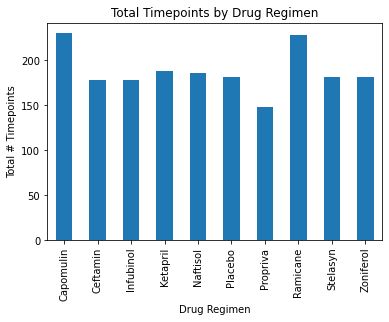

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tot_timepoints = drug_groupby["timepoint"].count()

tot_timepoints.plot.bar(xlabel="Drug Regimen", ylabel="Total # Timepoints", title="Total Timepoints by Drug Regimen")

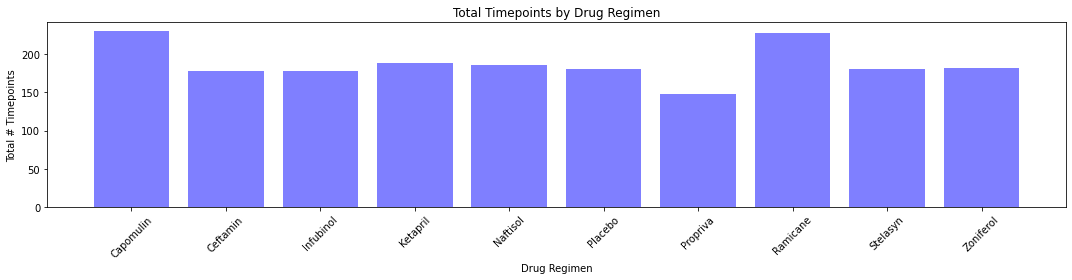

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = sorted(clean_df["drug"].unique())
tot_timepoints = drug_groupby["timepoint"].count()

plt.figure(figsize=(15,4))

x_axis = np.arange(len(drugs)) 
y_axis = tot_timepoints

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=45)

plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total # Timepoints")

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Mouse Distribution by Sex'}, ylabel='Sex'>

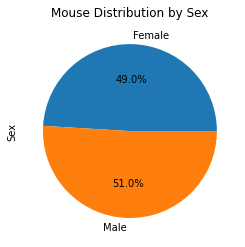

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_groupby = clean_df.groupby("sex")

f_to_m = sex_groupby["mouse"].count()

f_to_m.plot.pie(autopct="%1.1f%%", title="Mouse Distribution by Sex", ylabel="Sex")

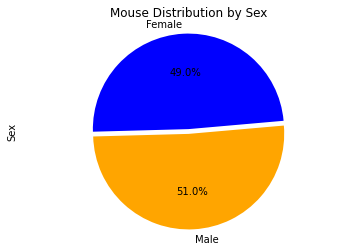

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_groupby = clean_df.groupby("sex")
f_to_m = sex_groupby["mouse"].count()

sexes = ["Female", "Male"] 
colors = ["blue", "orange"]
explode = (0.05, 0.0)

plt.pie(f_to_m, labels=sexes, colors=colors,
        autopct="%1.1f%%", explode=explode, shadow=False, startangle=5)

plt.axis("equal")
plt.ylabel("Sex")
plt.title("Mouse Distribution by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

clean_df.sort_values(by="drug")

max_tp = clean_df.groupby(["mouse"])["timepoint"].max()

max_tp

mouse
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: timepoint, Length: 248, dtype: int64

In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_df = pd.merge(max_tp, clean_df, how="inner", on=(["mouse", "timepoint"]))
new_df = new_df.sort_values(by="drug").reset_index()

new_df

,index,mouse,timepoint,drug,sex,age,weight,tumvol,metasites
0,66,g316,45,Capomulin,Female,22,22,40.159220,2
1,180,s710,45,Capomulin,Female,1,23,40.728578,1
2,183,t565,45,Capomulin,Female,20,17,34.455298,0
3,169,r944,45,Capomulin,Male,12,25,41.581521,2
4,163,r554,45,Capomulin,Female,8,17,32.377357,3
...,...,...,...,...,...,...,...,...,...
243,215,w575,45,Zoniferol,Female,16,28,68.401286,3
244,30,c302,45,Zoniferol,Female,10,29,64.575222,4
245,28,c264,45,Zoniferol,Female,11,27,67.942121,2
246,155,q511,45,Zoniferol,Female,2,28,68.611061,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [16]:
capo_df = new_df[new_df["drug"] == "Capomulin"]
rami_df = new_df[new_df["drug"] == "Ramicane"]
infu_df = new_df[new_df["drug"] == "Infubinol"]
ceft_df = new_df[new_df["drug"] == "Ceftamin"]

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
## capomulin

capomulin_lowerq = capo_df["tumvol"].quantile(.25)
capomulin_upperq = capo_df["tumvol"].quantile(.75)
capomulin_median = capo_df["tumvol"].quantile(.50)

capomulin_iqr = capomulin_upperq - capomulin_lowerq  

capomulin_lbound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_ubound = capomulin_upperq + (1.5 * capomulin_iqr)

print(f"REPORT FOR: CAPOMULIN")
print(f"The lower quartile: {capomulin_lowerq}")
print(f"The upper quartile: {capomulin_upperq}")
print(f"The interquartile range: {capomulin_iqr}")
print(f"The median: {capomulin_median}")
print(f"Values below {capomulin_lbound} could be outliers.")
print(f"Values above {capomulin_ubound} could be outliers.")
print(f"Min: {capo_df['tumvol'].min()}")
print(f"Max: {capo_df['tumvol'].max()}")

if (capo_df['tumvol'].min() < capomulin_lbound) or (capo_df['tumvol'].max() > capomulin_ubound):
    print("WE'VE GOT AT LEAST ONE OUTLIER!")

REPORT FOR: CAPOMULIN
The lower quartile: 32.37735684
The upper quartile: 40.1592203
The interquartile range: 7.781863460000004
The median: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Min: 23.34359787
Max: 47.68596303


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
## ramicane

ramicane_lowerq = rami_df["tumvol"].quantile(.25)
ramicane_upperq = rami_df["tumvol"].quantile(.75)
ramicane_median = rami_df["tumvol"].quantile(.50)

ramicane_iqr = ramicane_upperq - ramicane_lowerq  

ramicane_lbound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_ubound = ramicane_upperq + (1.5 * ramicane_iqr)

print(f"REPORT FOR: RAMICANE")
print(f"The lower quartile: {ramicane_lowerq}")
print(f"The upper quartile: {ramicane_upperq}")
print(f"The interquartile range: {ramicane_iqr}")
print(f"The median: {ramicane_median}")
print(f"Values below {ramicane_lbound} could be outliers.")
print(f"Values above {ramicane_ubound} could be outliers.")
print(f"Min: {rami_df['tumvol'].min()}")
print(f"Max: {rami_df['tumvol'].max()}")

if (rami_df['tumvol'].min() < ramicane_lbound) or (rami_df['tumvol'].max() > ramicane_ubound):
    print("WE'VE GOT AT LEAST ONE OUTLIER!")

REPORT FOR: RAMICANE
The lower quartile: 31.56046955
The upper quartile: 40.65900627
The interquartile range: 9.098536719999998
The median: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Min: 22.05012627
Max: 45.22086888


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
## infubinol

infubinol_lowerq = infu_df["tumvol"].quantile(.25)
infubinol_upperq = infu_df["tumvol"].quantile(.75)
infubinol_median = infu_df["tumvol"].quantile(.50)

infubinol_iqr = infubinol_upperq - infubinol_lowerq  

infubinol_lbound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_ubound = infubinol_upperq + (1.5 * infubinol_iqr)

print(f"REPORT FOR: INFUBINOL")
print(f"The lower quartile: {infubinol_lowerq}")
print(f"The upper quartile: {infubinol_upperq}")
print(f"The interquartile range: {infubinol_iqr}")
print(f"The median: {infubinol_median}")
print(f"Values below {infubinol_lbound} could be outliers.")
print(f"Values above {infubinol_ubound} could be outliers.")
print(f"Min: {infu_df['tumvol'].min()}")
print(f"Max: {infu_df['tumvol'].max()}")

if (infu_df['tumvol'].min() < infubinol_lbound) or (infu_df['tumvol'].max() > infubinol_ubound):
    print("WE'VE GOT AT LEAST ONE OUTLIER!")

REPORT FOR: INFUBINOL
The lower quartile: 54.04860769
The upper quartile: 65.52574285
The interquartile range: 11.477135160000003
The median: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Min: 36.3213458
Max: 72.2267309
WE'VE GOT AT LEAST ONE OUTLIER!


In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
## ceftamin

ceftamin_lowerq = ceft_df["tumvol"].quantile(.25)
ceftamin_upperq = ceft_df["tumvol"].quantile(.75)
ceftamin_median = ceft_df["tumvol"].quantile(.50)

ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq  

ceftamin_lbound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_ubound = ceftamin_upperq + (1.5 * ceftamin_iqr)

print(f"REPORT FOR: CEFTAMIN")
print(f"The lower quartile: {ceftamin_lowerq}")
print(f"The upper quartile: {ceftamin_upperq}")
print(f"The interquartile range: {ceftamin_iqr}")
print(f"The median: {ceftamin_median}")
print(f"Values below {ceftamin_lbound} could be outliers.")
print(f"Values above {ceftamin_ubound} could be outliers.")
print(f"Min: {ceft_df['tumvol'].min()}")
print(f"Max: {ceft_df['tumvol'].max()}")

if (ceft_df['tumvol'].min() < ceftamin_lbound) or (ceft_df['tumvol'].max() > ceftamin_ubound):
    print("WE'VE GOT AT LEAST ONE OUTLIER!")

REPORT FOR: CEFTAMIN
The lower quartile: 48.72207785
The upper quartile: 64.29983003
The interquartile range: 15.577752179999997
The median: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Min: 45.0
Max: 68.92318457


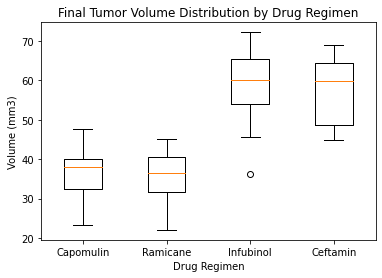

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

labels = drugs_of_interest

plt.boxplot([capo_df["tumvol"], rami_df["tumvol"], infu_df["tumvol"], ceft_df["tumvol"]], labels=labels)

plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Volume (mm3)")

plt.show()

## Line and Scatter Plots

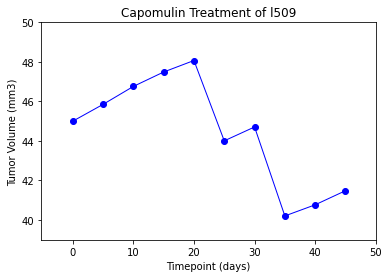

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

df = clean_df[clean_df["drug"] == "Capomulin"]

# l509

data = clean_df.loc[(clean_df["mouse"] == "l509"), ["timepoint", "tumvol"]]

plt.title("Capomulin Treatment of l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-5.25, 50)
plt.ylim(39, 50)

plt.plot(data["timepoint"], data["tumvol"], marker="o", color="blue", linewidth=1)
plt.show()

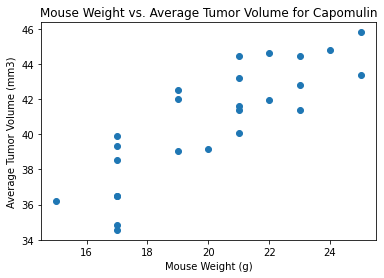

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

df = clean_df[clean_df["drug"] == "Capomulin"]

avg_tumvol = df.groupby("mouse")["tumvol"].mean()
mousew = df.groupby("mouse")["weight"].median()

plt.scatter(mousew, avg_tumvol)

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")

plt.show()

## Correlation and Regression

r-value = 0.84
r-squared = 0.71


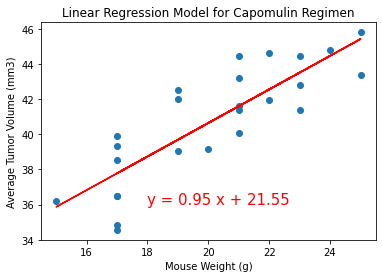

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# r-value

r_value = round(st.pearsonr(mousew, avg_tumvol)[0], 2)

print(f"r-value = {r_value}")

# r-value squared

print(f"r-squared = {round(r_value**2, 2)}")

# construct linear regression model

x_values = mousew
y_values = avg_tumvol

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (18, 36), fontsize=15, color="red")

plt.title("Linear Regression Model for Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

plt.show()